In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
data = np.loadtxt(open('sample_data/mnist_train_small.csv', 'rb'), delimiter = ',')

data = data[:, 1:]

# normalize the data
dataNorm = data / np.max(data)

# convert to tensor
dataT = torch.tensor(dataNorm).float()

In [ ]:
def createTheMNISTAE():

    class aenet(nn.Module):

        def __init__(self):

            super().__init__()

            # input layer
            self.input = nn.Linear(784, 250)

            # encoder layer
            self.enc = nn.Linear(250, 50)

            # latent layer
            self.lat = nn.Linear(50, 250)

            # decoder layer
            self.dec = nn.Linear(250, 784)

        def forward(self, X):
            X = F.relu(self.input(X))
            X = F.relu(self.enc(X))
            X = F.relu(self.lat(X))

            return torch.sigmoid(self.dec(X))

    net = aenet()

    lossfun = nn.MSELoss()

    optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)

    return net, lossfun, optimizer

In [ ]:
net, lossfun, optimizer = createTheMNISTAE()

X = dataT[:5, :]
yHat = net(X)

print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


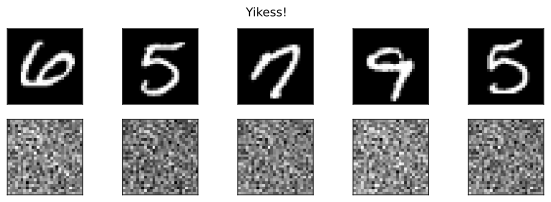

In [ ]:
fig, axs = plt.subplots(2, 5, figsize = (10, 3))

for i in range(5):
    axs[0, i].imshow(X[i, :].view(28,28).detach(), cmap = 'gray')
    axs[1, i].imshow(yHat[i, :].view(28,28).detach(), cmap = 'gray')
    axs[0, i].set_xticks([]), axs[0,i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1,i].set_yticks([])

plt.suptitle('Yikess!')
plt.show()

In [ ]:
def function2trainTheModel():

    numepochs = 10000

    net, lossfun, optimizer = createTheMNISTAE()

    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        # select a random set of images
        randomidx = np.random.choice(dataT.shape[0], size = 32)
        X = dataT[randomidx, :]

        # forward pass and loss
        yHat = net(X)
        loss = lossfun(yHat, X)

        # back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # losses in this epoch
        losses[epochi] = loss.item()


    return losses, net


In [ ]:

losses, net = function2trainTheModel()
print(f'Final loss : {losses[-1]:.4f}')

# visualize the losses
plt.plot(losses, '.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss ')
plt.title('MSE Loss')
plt.show()

KeyboardInterrupt: 

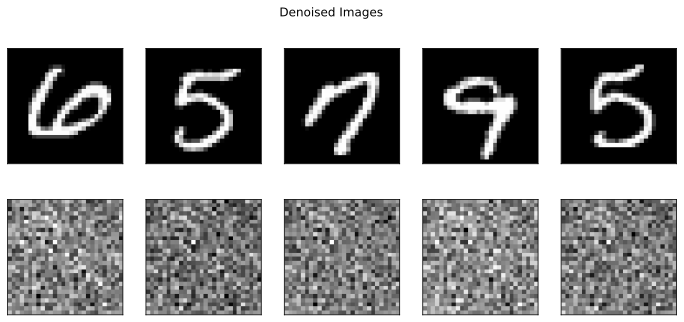

In [ ]:

X = dataT[:5, :]
yHat = net(X)

fig, axs = plt.subplots(2, 5, figsize = (12, 5))

for i in range(5):
    axs[0, i].imshow(X[i, :].view(28,28).detach(), cmap = 'gray')
    axs[1, i].imshow(yHat[i, :].view(28,28).detach(), cmap = 'gray')
    axs[0, i].set_xticks([]), axs[0,i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1,i].set_yticks([])

plt.suptitle('Denoised Images')
plt.show()

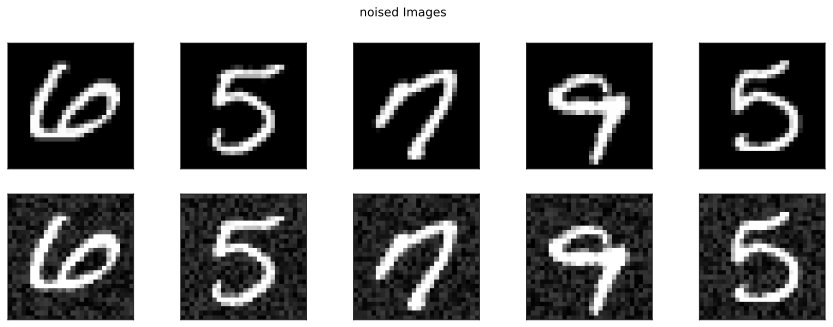

In [ ]:
# grabbing a subset of images
X = dataT[:10, :]

# add noise
Xnoise = X + torch.rand_like(X)/4

# clip at 1
Xnoise[Xnoise>1] = 1

fig, axs = plt.subplots(2, 5, figsize = (15, 5))

for i in range(5):
    axs[0, i].imshow(X[i, :].view(28,28).detach(), cmap = 'gray')
    axs[1, i].imshow(Xnoise[i, :].view(28,28).detach(), cmap = 'gray')
    axs[0, i].set_xticks([]), axs[0,i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1,i].set_yticks([])

plt.suptitle('noised Images')
plt.show()

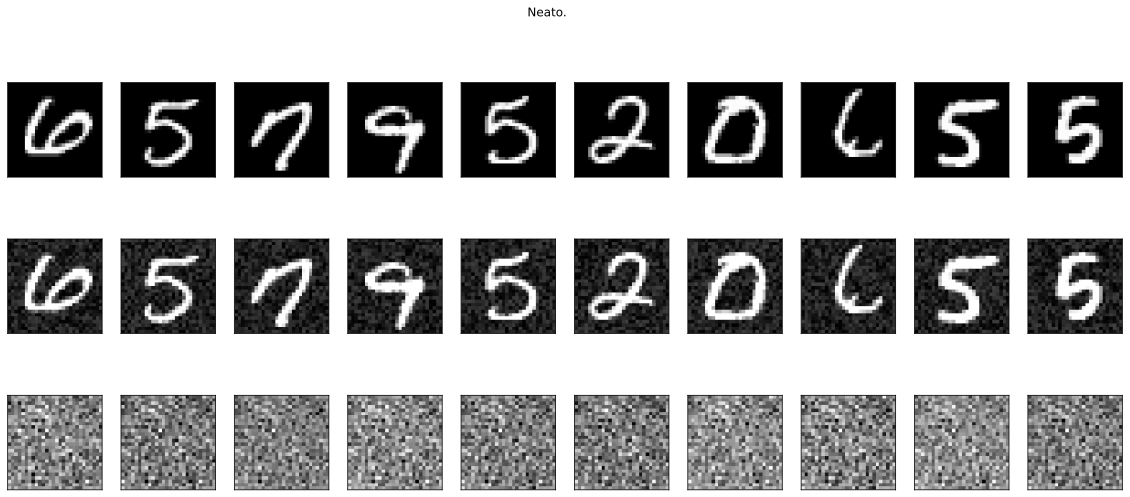

In [ ]:
Y = net(Xnoise)

fig, axs = plt.subplots(3, 10, figsize = (20, 8))

for i in range(10):
    axs[0, i].imshow(X[i, :].view(28,28).detach(), cmap = 'gray')
    axs[1, i].imshow(Xnoise[i, :].view(28,28).detach(), cmap = 'gray')
    axs[2, i].imshow(Y[i, :].view(28,28).detach(), cmap = 'gray')
    axs[0, i].set_xticks([]), axs[0,i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1,i].set_yticks([])
    axs[2, i].set_xticks([]), axs[2,i].set_yticks([])

plt.suptitle('Neato.')
plt.show()